# importing libraries and data

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from keras.datasets import cifar10
import tensorflow as tf
from tensorflow.keras import Sequential
from random import randint
from tensorflow.keras.layers import (
    Input,
    Dense,
    BatchNormalization,
    Dropout,
    Activation,
    Flatten,
    MaxPool2D,
    Conv2D,
)

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
labels = {
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck",
}

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
y_test.shape

(10000, 1)

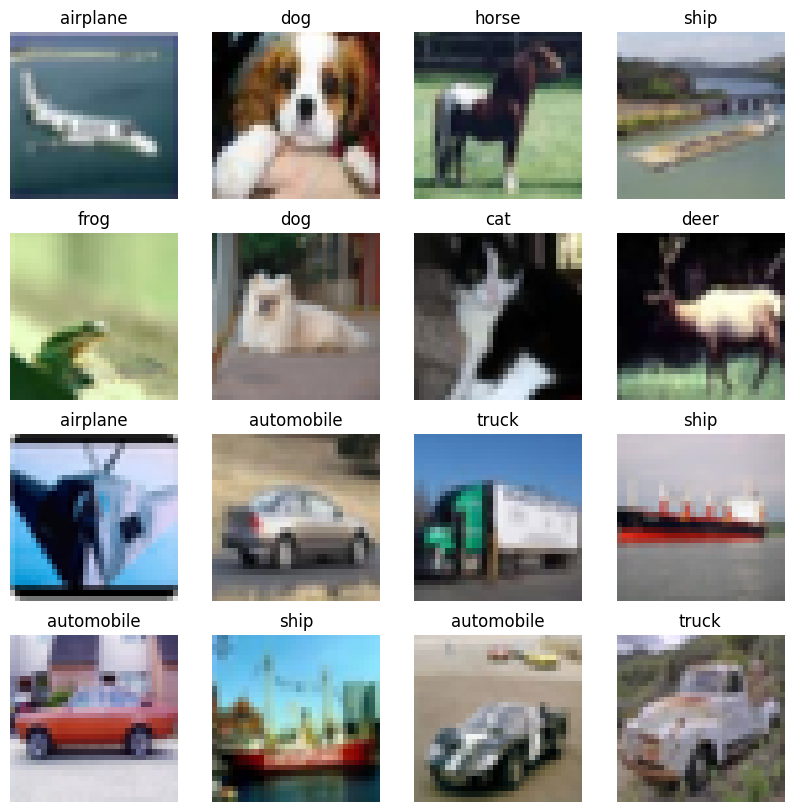

In [8]:
plt.figure(figsize=(10,10))
for i in range(1,17):
        index=randint(0,49999)
        plt.subplot(4,4,i)
        plt.imshow(X_train[index])
        plt.axis("off")
        plt.title(labels[y_train[index][0]])

In [9]:
# scaling
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train=X_train/255
X_test=X_test/255


# Model

In [72]:
model=Sequential()

In [73]:
model.add(Conv2D(filters=16,kernel_size=(3,3),input_shape=(32, 32, 3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=16,kernel_size=(3,3),activation="relu",padding="same"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation="relu"))
model.add(Dense(10,activation="softmax"))

In [74]:
model.compile('adam',loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [69]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_34 (MaxPooli  (None, 15, 15, 16)        0         
 ng2D)                                                           
                                                                 
 dropout_11 (Dropout)        (None, 15, 15, 16)        0         
                                                                 
 conv2d_46 (Conv2D)          (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_35 (MaxPooli  (None, 6, 6, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_47 (Conv2D)          (None, 4, 4, 64)        

In [75]:
hist=model.fit(X_train,y_train,epochs=30)

Epoch 1/30
1563/1563 [==============================] - 9s 5ms/step - loss: 1.6883 - accuracy: 0.3717
Epoch 2/30
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3003 - accuracy: 0.5297
Epoch 3/30
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1592 - accuracy: 0.5845
Epoch 4/30
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0707 - accuracy: 0.6195
Epoch 5/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9997 - accuracy: 0.6451
Epoch 6/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9483 - accuracy: 0.6633
Epoch 7/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9079 - accuracy: 0.6772
Epoch 8/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8686 - accuracy: 0.6906
Epoch 9/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8360 - accuracy: 0.7033
Epoch 10/30
1563/1563 [==============================] - 9s 6ms/step - loss: 0.812

In [78]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.0195 - accuracy: 0.6914


[1.019471526145935, 0.6913999915122986]

Text(0, 0.5, 'loss')

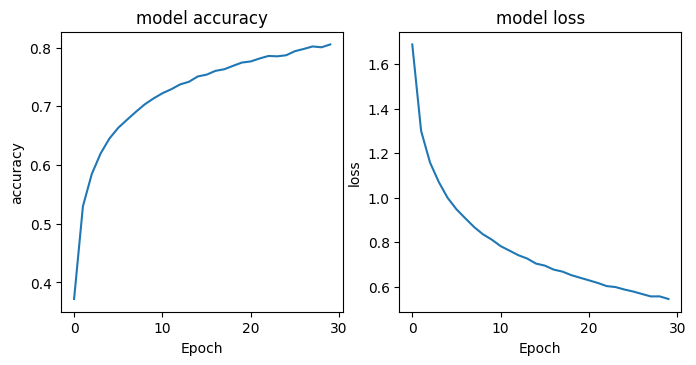

In [83]:
plt.figure(figsize=(8, 8))
plt.subplot(2,2,1)
plt.title("model accuracy")
plt.plot(hist.history["accuracy"])
plt.xlabel("Epoch")
plt.ylabel("accuracy")

plt.subplot(2,2,2)
plt.title("model loss")
plt.plot(hist.history["loss"])
plt.xlabel("Epoch")
plt.ylabel("loss")

In [84]:
y_pred=model.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)

313/313 [==============================] - 1s 3ms/step


<Axes: >

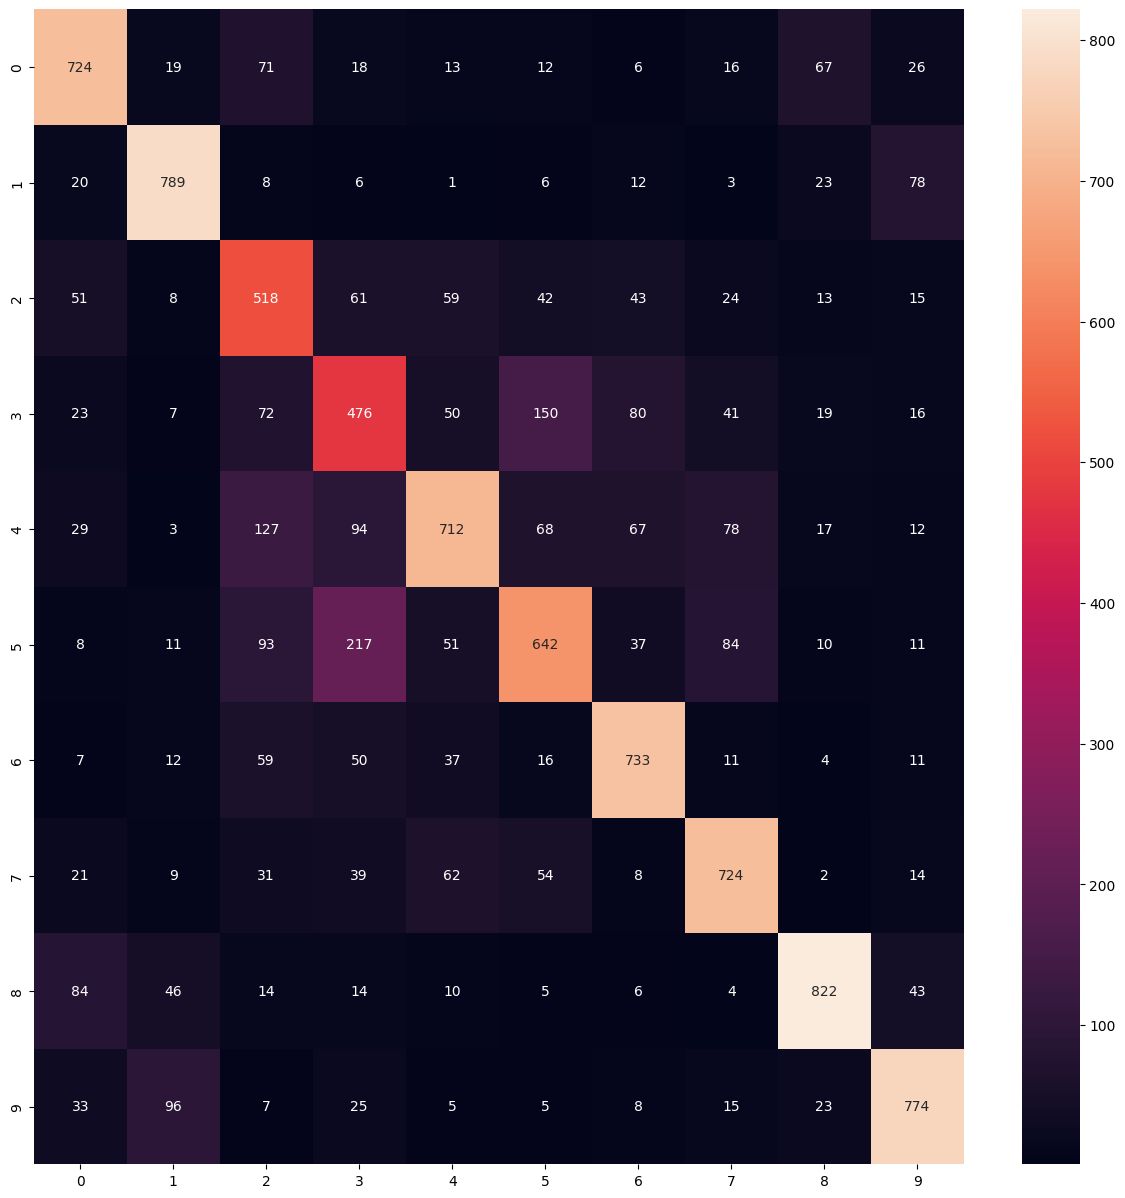

In [85]:
plt.figure(figsize=(15,15))
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True,fmt="d")

In [86]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73      1000
           1       0.83      0.79      0.81      1000
           2       0.62      0.52      0.56      1000
           3       0.51      0.48      0.49      1000
           4       0.59      0.71      0.65      1000
           5       0.55      0.64      0.59      1000
           6       0.78      0.73      0.76      1000
           7       0.75      0.72      0.74      1000
           8       0.78      0.82      0.80      1000
           9       0.78      0.77      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000

